In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.family']= 'NanumGothic' 
plt.rcParams['axes.unicode_minus']=False


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Ïù∏Íµ¨Ï£ºÌÉùÏ¥ùÏ°∞ÏÇ¨_2%_Ïù∏Íµ¨ÏÇ¨Ìï≠(Ï†úÍ≥µ)_2020.csv", encoding='cp949')  # Ïã§Ï†ú ÌååÏùºÎ™ÖÏúºÎ°ú ÏàòÏ†ïÌïòÏÑ∏Ïöî

# ÌÉÄÍ≤ü Î≥ÄÏàò Ï†ïÏùò: ÏàòÎèÑÍ∂å Ïô∏Î∂Ä ‚Üí ÏàòÎèÑÍ∂å Ïú†ÏûÖÏûê = 1, ÏàòÎèÑÍ∂å ÎÇ¥ Ïù¥Îèô = 0
# ÏïÑÎûòÎäî ÏòàÏãúÏù¥Î©∞, ÏàòÎèÑÍ∂å ÏΩîÎìú Í∏∞Î∞òÏúºÎ°ú ÏÉùÏÑ±Ìï¥Ïïº Ìï©ÎãàÎã§
def classify_movement(row):
    if (row['1ÎÖÑÏ†ÑÍ±∞Ï£ºÏßÄ_ÌÉÄÏãúÎèÑÌñâÏ†ïÍµ¨Ïó≠ÏΩîÎìú'] not in [31, 11,23]) and (row['ÌñâÏ†ïÍµ¨Ïó≠ÏãúÎèÑÏΩîÎìú'] in [31, 11,23]):
        return 1  # ÎπÑÏàòÎèÑÍ∂å ‚Üí ÏàòÎèÑÍ∂å
    elif (row['1ÎÖÑÏ†ÑÍ±∞Ï£ºÏßÄ_ÌÉÄÏãúÎèÑÌñâÏ†ïÍµ¨Ïó≠ÏΩîÎìú'] in [31, 11,23]) and (row['ÌñâÏ†ïÍµ¨Ïó≠ÏãúÎèÑÏΩîÎìú'] in [31, 11,23]):
        return 0  # ÏàòÎèÑÍ∂å ÎÇ¥ Ïù¥Îèô
    else:
        return None  # Ï†úÏô∏

df['Ïù¥ÎèôÏú†Ìòï'] = df.apply(classify_movement, axis=1)
df = df.dropna(subset=['Ïù¥ÎèôÏú†Ìòï'])

from sklearn.preprocessing import LabelEncoder

# ÏÇ¨Ïö© Î≥ÄÏàò
features = [
    'ÎßåÏó∞Î†π', 'ÏÑ±Î≥ÑÏΩîÎìú', 'ÍµêÏú°Ï†ïÎèÑÏΩîÎìú', 'ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú',
    'Ï∂úÏÉùÏßÄ_ÌÉÄÌñâÏ†ïÍµ¨Ïó≠ÏãúÎèÑÏΩîÎìú', '1ÎÖÑÏ†ÑÍ±∞Ï£ºÏßÄ_ÌÉÄÏãúÎèÑÌñâÏ†ïÍµ¨Ïó≠ÏΩîÎìú',
    '5ÎÖÑÏ†ÑÍ±∞Ï£ºÏßÄ_ÌÉÄÏãúÎèÑÌñâÏ†ïÍµ¨Ïó≠ÏΩîÎìú', 'ÏßÅÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú',
    'ÏÇ∞ÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú', 'ÌÜµÍ∑ºÌÜµÌïô_ÌÉÄÌñâÏ†ïÍµ¨Ïó≠ÏùçÎ©¥ÎèôÏΩîÎìú',
    'Í∞ÄÍµ¨Ï£ºÍ¥ÄÍ≥ÑÏΩîÎìú'
]

X = df[features].copy()
y = df['Ïù¥ÎèôÏú†Ìòï']

# Label Encoding: Î™®Îì† objectÌòï ÌòπÏùÄ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º Ïà´ÏûêÎ°ú Î≥ÄÌôò
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
X = X.dropna()
y = y.loc[X.index]

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Í≤∞Í≥º Ï∂úÎ†•
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      5540
         1.0       1.00      0.99      1.00      6155

    accuracy                           1.00     11695
   macro avg       1.00      1.00      1.00     11695
weighted avg       1.00      1.00      1.00     11695



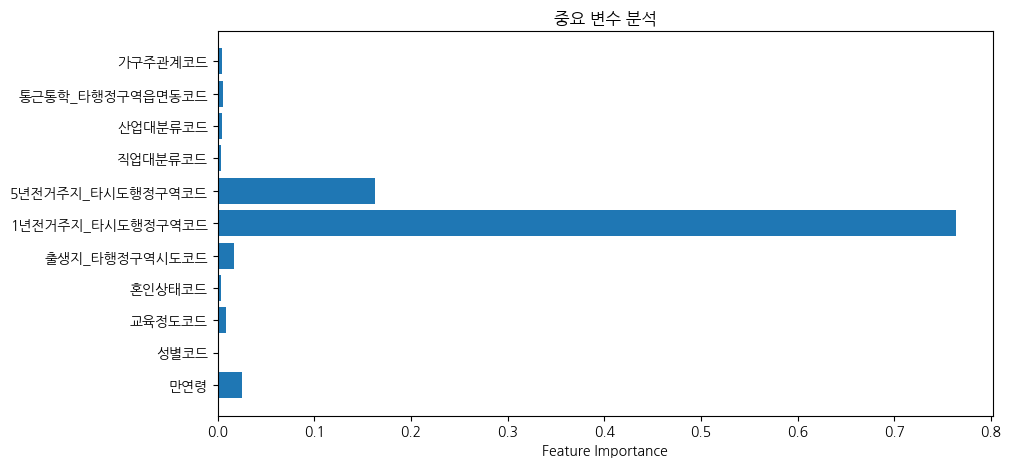

In [5]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Ï§ëÏöî Î≥ÄÏàò Î∂ÑÏÑù")
plt.show()


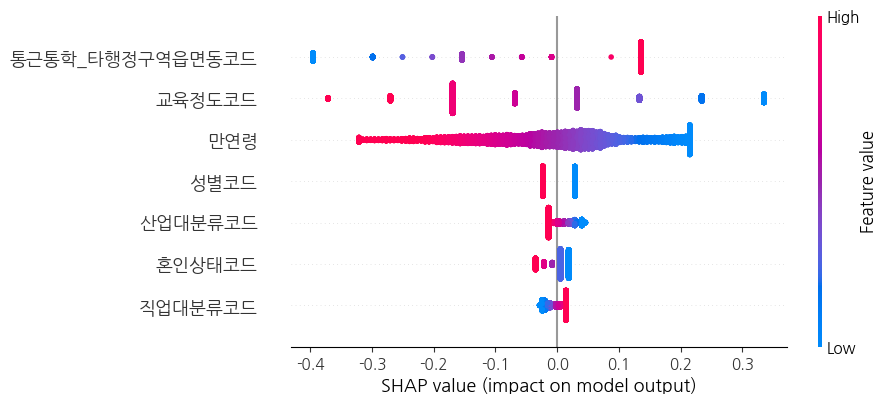


[üìä Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏÑ±Îä• ÌèâÍ∞Ä]
              precision    recall  f1-score       support
0.0            0.562559  0.428520  0.486475   5540.000000
1.0            0.576455  0.700081  0.632282   6155.000000
accuracy       0.571441  0.571441  0.571441      0.571441
macro avg      0.569507  0.564301  0.559379  11695.000000
weighted avg   0.569872  0.571441  0.563212  11695.000000

[üìå Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í≥ÑÏàò Ï§ëÏöîÎèÑ]
           Feature  Coefficient
2           ÍµêÏú°Ï†ïÎèÑÏΩîÎìú    -0.100837
1             ÏÑ±Î≥ÑÏΩîÎìú    -0.052031
6  ÌÜµÍ∑ºÌÜµÌïô_ÌÉÄÌñâÏ†ïÍµ¨Ïó≠ÏùçÎ©¥ÎèôÏΩîÎìú     0.048277
3           ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú    -0.013418
0              ÎßåÏó∞Î†π    -0.006302
4          ÏßÅÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú     0.004253
5          ÏÇ∞ÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú    -0.002837


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import shap
import matplotlib.pyplot as plt


# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("Ïù∏Íµ¨Ï£ºÌÉùÏ¥ùÏ°∞ÏÇ¨_2%_Ïù∏Íµ¨ÏÇ¨Ìï≠(Ï†úÍ≥µ)_2020.csv", encoding='cp949')  # Ïã§Ï†ú ÌååÏùºÎ™ÖÏúºÎ°ú ÏàòÏ†ïÌïòÏÑ∏Ïöî

def classify_movement(row):
    if (row['1ÎÖÑÏ†ÑÍ±∞Ï£ºÏßÄ_ÌÉÄÏãúÎèÑÌñâÏ†ïÍµ¨Ïó≠ÏΩîÎìú'] not in [31, 11,23]) and (row['ÌñâÏ†ïÍµ¨Ïó≠ÏãúÎèÑÏΩîÎìú'] in [31, 11,23]):
        return 1  # ÎπÑÏàòÎèÑÍ∂å ‚Üí ÏàòÎèÑÍ∂å
    elif (row['1ÎÖÑÏ†ÑÍ±∞Ï£ºÏßÄ_ÌÉÄÏãúÎèÑÌñâÏ†ïÍµ¨Ïó≠ÏΩîÎìú'] in [31, 11,23]) and (row['ÌñâÏ†ïÍµ¨Ïó≠ÏãúÎèÑÏΩîÎìú'] in [31, 11,23]):
        return 0  # ÏàòÎèÑÍ∂å ÎÇ¥ Ïù¥Îèô
    else:
        return None  # Ï†úÏô∏

df['Ïù¥ÎèôÏú†Ìòï'] = df.apply(classify_movement, axis=1)
df = df.dropna(subset=['Ïù¥ÎèôÏú†Ìòï'])
# ÏÇ¨Ïö© ÌîºÏ≤ò ÏßÄÏ†ï
features = [
    'ÎßåÏó∞Î†π', 'ÏÑ±Î≥ÑÏΩîÎìú', 'ÍµêÏú°Ï†ïÎèÑÏΩîÎìú', 'ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú',
    'ÏßÅÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú', 'ÏÇ∞ÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú', 'ÌÜµÍ∑ºÌÜµÌïô_ÌÉÄÌñâÏ†ïÍµ¨Ïó≠ÏùçÎ©¥ÎèôÏΩîÎìú'
]
target = 'Ïù¥ÎèôÏú†Ìòï'

X = df[features].copy()
y = df[target]

# Î≤îÏ£ºÌòï Î≥ÄÏàò Ïù∏ÏΩîÎî©
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# ÌïôÏäµ Î∞è Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# ÌöåÍ∑Ä Í≥ÑÏàò Ï†ïÎ¶¨
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logit.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

# SHAP Î∂ÑÏÑù
explainer = shap.Explainer(logit, X_train, feature_names=X.columns)
shap_values = explainer(X_test)

# SHAP ÏöîÏïΩ ÏãúÍ∞ÅÌôî
shap.plots.beeswarm(shap_values, max_display=10)

print("\n[üìä Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏÑ±Îä• ÌèâÍ∞Ä]")
print(report_df)

print("\n[üìå Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í≥ÑÏàò Ï§ëÏöîÎèÑ]")
print(coef_df)

In [10]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/e5/bb/dc75933de86e6076f58cf68325877be952a97a371c26b252013f1258a5a7/shap-0.47.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/544.4 kB 1.3 MB/s eta 0:00:01
   ------------------ --------------------- 256.0/544.4 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 4.9 MB/s eta 0:00:00


In [15]:
# ÌïÑÏöîÌïú Ï∂îÍ∞Ä Î≥ÄÏàò Î¶¨Ïä§Ìä∏
added_columns = [
    # 2Î≤à: Í≤ΩÏ†úÌôúÎèô Í¥ÄÎ†®
    'Í≤ΩÏ†úÌôúÎèôÏÉÅÌÉúÏΩîÎìú', 'Ï¢ÖÏÇ¨ÏÉÅÏßÄÏúÑÏΩîÎìú', 'ÌòÑÏßÅÏóÖÍ∑ºÎ¨¥ÎÖÑÏàòÏΩîÎìú',
    # 4Î≤à: Í∞ÄÏ°± Î∞è ÏûêÎÖÄ Í¥ÄÎ†®
    'Ï∂îÍ∞ÄÏûêÎÖÄÍ≥ÑÌöçÏú†Î¨¥', 'Ï∂îÍ∞ÄÍ≥ÑÌöçÏûêÎÖÄÏàò', 'Í≤ΩÎ†•Îã®Ï†àÏú†Î¨¥',
    # 5Î≤à: ÏÇ¨ÌöåÌôúÎèô Í¥ÄÎ†®
    'ÏÇ¨ÌöåÌôúÎèô_ÏÇ¨ÌöåÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Í≤ΩÏ†úÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Î¨∏ÌôîÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Ï†ïÏπòÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Ï¢ÖÍµêÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_ÏßÄÏó≠Îã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_ÏπúÎ™©Îã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_ÍµêÏú°Îã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Í∏∞ÌÉÄ_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_ÏóÜÏùå_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä'
]

# Í∏∞Ï°¥ ÏÇ¨Ïö©ÌñàÎçò Í∏∞Î≥∏ Î≥ÄÏàò Î¶¨Ïä§Ìä∏
base_columns = [
    'ÎßåÏó∞Î†π', 'ÏÑ±Î≥ÑÏΩîÎìú', 'ÍµêÏú°Ï†ïÎèÑÏΩîÎìú', 'ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú',
    'ÏßÅÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú', 'ÏÇ∞ÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú', 'ÌÜµÍ∑ºÌÜµÌïô_ÌÉÄÌñâÏ†ïÍµ¨Ïó≠ÏùçÎ©¥ÎèôÏΩîÎìú'
]

# Ï†ÑÏ≤¥ ÌîºÏ≤ò Íµ¨ÏÑ±
all_features = base_columns + added_columns

# ÎàÑÎùΩÎêú Ïª¨Îüº ÏûàÎäîÏßÄ ÌôïÏù∏
missing_cols = [col for col in all_features if col not in df.columns]

missing_cols


[]

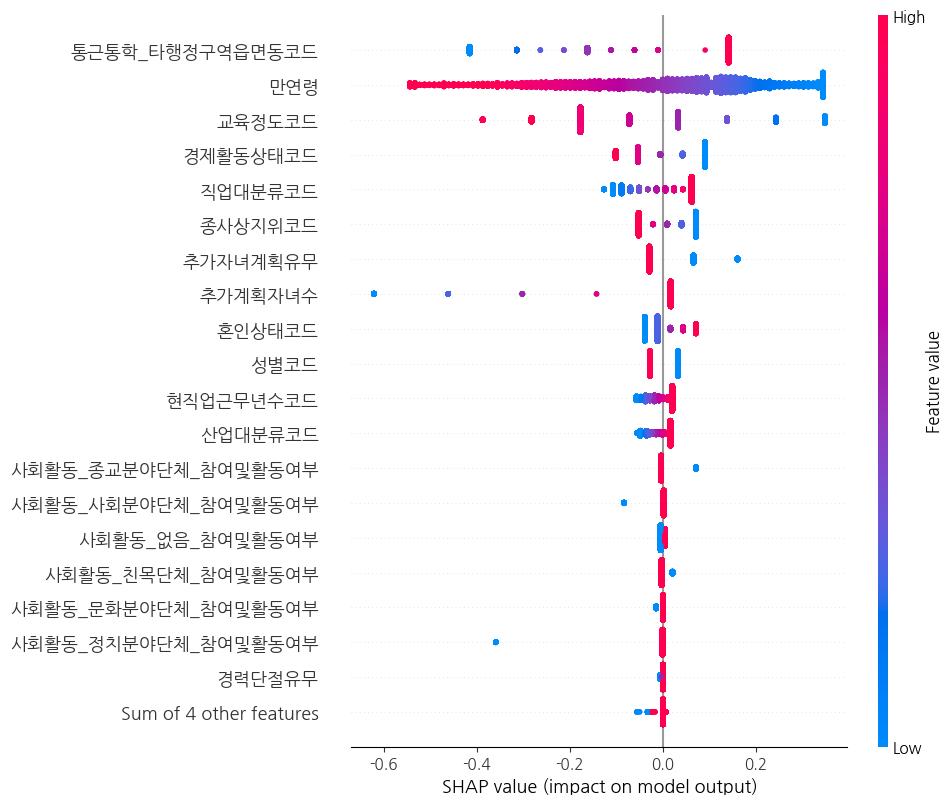


[üìä Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏÑ±Îä• ÌèâÍ∞Ä]
              precision    recall  f1-score       support
0.0            0.563472  0.451083  0.501053   5540.000000
1.0            0.581129  0.685459  0.628997   6155.000000
accuracy       0.574434  0.574434  0.574434      0.574434
macro avg      0.572301  0.568271  0.565025  11695.000000
weighted avg   0.572765  0.574434  0.568389  11695.000000

[üìå Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í≥ÑÏàò Ï§ëÏöîÎèÑ]
                Feature  Coefficient
16  ÏÇ¨ÌöåÌôúÎèô_Ï†ïÏπòÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä     0.358492
21      ÏÇ¨ÌöåÌôúÎèô_Í∏∞ÌÉÄ_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä    -0.286094
11              Ï∂îÍ∞ÄÍ≥ÑÌöçÏûêÎÖÄÏàò     0.159549
2                ÍµêÏú°Ï†ïÎèÑÏΩîÎìú    -0.105115
10             Ï∂îÍ∞ÄÏûêÎÖÄÍ≥ÑÌöçÏú†Î¨¥    -0.094833
13  ÏÇ¨ÌöåÌôúÎèô_ÏÇ¨ÌöåÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä     0.085408
17  ÏÇ¨ÌöåÌôúÎèô_Ï¢ÖÍµêÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä    -0.075386
1                  ÏÑ±Î≥ÑÏΩîÎìú    -0.059939
6       ÌÜµÍ∑ºÌÜµÌïô_ÌÉÄÌñâÏ†ïÍµ¨Ïó≠ÏùçÎ©¥ÎèôÏΩîÎìú   

In [16]:
# ‚úÖ Ï†ÑÏ≤¥ ÌîºÏ≤ò Íµ¨ÏÑ± (Í∏∞Ï°¥ + 2Î≤à, 4Î≤à, 5Î≤à)
all_features = [
    # Í∏∞Î≥∏
    'ÎßåÏó∞Î†π', 'ÏÑ±Î≥ÑÏΩîÎìú', 'ÍµêÏú°Ï†ïÎèÑÏΩîÎìú', 'ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú',
    'ÏßÅÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú', 'ÏÇ∞ÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú', 'ÌÜµÍ∑ºÌÜµÌïô_ÌÉÄÌñâÏ†ïÍµ¨Ïó≠ÏùçÎ©¥ÎèôÏΩîÎìú',
    
    # 2Î≤à: Í≤ΩÏ†úÌôúÎèô Í¥ÄÎ†®
    'Í≤ΩÏ†úÌôúÎèôÏÉÅÌÉúÏΩîÎìú', 'Ï¢ÖÏÇ¨ÏÉÅÏßÄÏúÑÏΩîÎìú', 'ÌòÑÏßÅÏóÖÍ∑ºÎ¨¥ÎÖÑÏàòÏΩîÎìú',

    # 4Î≤à: Í∞ÄÏ°± Î∞è ÏûêÎÖÄ Í¥ÄÎ†®
    'Ï∂îÍ∞ÄÏûêÎÖÄÍ≥ÑÌöçÏú†Î¨¥', 'Ï∂îÍ∞ÄÍ≥ÑÌöçÏûêÎÖÄÏàò', 'Í≤ΩÎ†•Îã®Ï†àÏú†Î¨¥',

    # 5Î≤à: ÏÇ¨ÌöåÌôúÎèô Ï∞∏Ïó¨ Ïó¨Î∂Ä
    'ÏÇ¨ÌöåÌôúÎèô_ÏÇ¨ÌöåÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Í≤ΩÏ†úÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Î¨∏ÌôîÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Ï†ïÏπòÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Ï¢ÖÍµêÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_ÏßÄÏó≠Îã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_ÏπúÎ™©Îã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_ÍµêÏú°Îã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_Í∏∞ÌÉÄ_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä',
    'ÏÇ¨ÌöåÌôúÎèô_ÏóÜÏùå_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä'
]

target = 'Ïù¥ÎèôÏú†Ìòï'

# ‚úÖ Ï†ÑÏ≤¥ ÌîºÏ≤ò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
X = df[all_features].copy()
y = df[target]

# ‚úÖ Ïù∏ÏΩîÎî©: objectÎøê ÏïÑÎãàÎùº intÌòï Î™ÖÎ™© Î≥ÄÏàòÎèÑ Ï≤òÎ¶¨
for col in X.columns:
    if X[col].dtype == 'object' or X[col].nunique() < 10:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))  # Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÌôò

# ‚úÖ Î™®Îç∏ ÌïôÏäµ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

# ‚úÖ ÏÑ±Îä• Ï∂úÎ†•
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# ‚úÖ Í≥ÑÏàò Ï†ïÎ¶¨
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logit.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

# ‚úÖ SHAP Ìï¥ÏÑù
explainer = shap.Explainer(logit, X_train, feature_names=X.columns)
shap_values = explainer(X_test)

# ‚úÖ SHAP ÏöîÏïΩ ÏãúÍ∞ÅÌôî
shap.plots.beeswarm(shap_values, max_display=20)

# ‚úÖ Ï∂úÎ†•
print("\n[üìä Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏÑ±Îä• ÌèâÍ∞Ä]")
print(report_df)

print("\n[üìå Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Í≥ÑÏàò Ï§ëÏöîÎèÑ]")
print(coef_df)


In [17]:
from IPython.display import display
display(report_df)
display(coef_df)

precision    recall  f1-score       support
0.0            0.563472  0.451083  0.501053   5540.000000
1.0            0.581129  0.685459  0.628997   6155.000000
accuracy       0.574434  0.574434  0.574434      0.574434
macro avg      0.572301  0.568271  0.565025  11695.000000
weighted avg   0.572765  0.574434  0.568389  11695.000000

Feature  Coefficient
16  ÏÇ¨ÌöåÌôúÎèô_Ï†ïÏπòÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä     0.358492
21      ÏÇ¨ÌöåÌôúÎèô_Í∏∞ÌÉÄ_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä    -0.286094
11              Ï∂îÍ∞ÄÍ≥ÑÌöçÏûêÎÖÄÏàò     0.159549
2                ÍµêÏú°Ï†ïÎèÑÏΩîÎìú    -0.105115
10             Ï∂îÍ∞ÄÏûêÎÖÄÍ≥ÑÌöçÏú†Î¨¥    -0.094833
13  ÏÇ¨ÌöåÌôúÎèô_ÏÇ¨ÌöåÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä     0.085408
17  ÏÇ¨ÌöåÌôúÎèô_Ï¢ÖÍµêÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä    -0.075386
1                  ÏÑ±Î≥ÑÏΩîÎìú    -0.059939
6       ÌÜµÍ∑ºÌÜµÌïô_ÌÉÄÌñâÏ†ïÍµ¨Ïó≠ÏùçÎ©¥ÎèôÏΩîÎìú     0.050644
7              Í≤ΩÏ†úÌôúÎèôÏÉÅÌÉúÏΩîÎìú    -0.047936
18    ÏÇ¨ÌöåÌôúÎèô_ÏßÄÏó≠Îã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä     0.033256
8               Ï¢ÖÏÇ¨ÏÉÅÏßÄÏúÑÏΩîÎìú    -0.030672
3                ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú     0.027502
19    ÏÇ¨ÌöåÌôúÎèô_ÏπúÎ™©Îã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä    -0.023235
20    ÏÇ¨ÌöåÌôúÎèô_ÍµêÏú°Îã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä     0.022755
4               ÏßÅÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú     0.018841
15  ÏÇ¨ÌöåÌôúÎèô_Î¨∏ÌôîÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä     0.014985
0                   ÎßåÏó∞Î†π    -0.010450
9             ÌòÑÏßÅÏóÖÍ∑ºÎ¨¥ÎÖÑÏàòÏΩîÎìú     0.009615
22      ÏÇ¨ÌöåÌôúÎèô_ÏóÜÏùå_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä     0.009173
14  ÏÇ¨ÌöåÌôúÎèô_Í≤ΩÏ†úÎ∂ÑÏïºÎã®Ï≤¥_Ï∞∏Ïó¨Î∞èÌôúÎèôÏó¨Î∂Ä    -0.005745
5               ÏÇ∞ÏóÖÎåÄÎ∂ÑÎ•òÏΩîÎìú     0.003417
12               Í≤ΩÎ†•Îã®Ï†àÏú†Î¨¥     0.003026

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import shap

# all_features Î∞è targetÏùÄ Ïù¥ÎØ∏ Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï
X = df[all_features].copy()
y = df[target]

for col in X.columns:
    if X[col].dtype == 'object' or X[col].nunique() < 10:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

explainer = shap.Explainer(logit, X_train, feature_names=X.columns)
shap_values = explainer(X_test)


In [21]:
import numpy as np

# Ïú†ÏûÖÏûêÎ°ú ÏòàÏ∏°Îêú ÏÉòÌîå Ï§ë ÌïòÎÇò ÏÑ†ÌÉù
sample_index = np.where((y_test == 1) & (y_pred == 1))[0][0]
sample = X_test.iloc[sample_index]
# ÏÉòÌîåÏùÑ 2Ï∞®Ïõê ÌòïÌÉúÎ°ú Î≥ÄÌôò
sample_reshaped = sample.to_frame().T  # ÎòêÎäî sample.values.reshape(1, -1)

# SHAP Í∞í Í≥ÑÏÇ∞
shap_value_single = explainer(sample_reshaped)

# Waterfall plot ÏãúÍ∞ÅÌôî
shap.plots.waterfall(shap_value_single[0])


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# ÏàòÎèÑÍ∂å Ïú†ÏûÖÏûêÎßå ÌïÑÌÑ∞ÎßÅ
inflow_df = df[df['Ïù¥ÎèôÏú†Ìòï'] == 1].copy()
X_inflow = inflow_df[all_features]

# Ïù∏ÏΩîÎî© (LabelEncoder Ï†ÅÏö©)
for col in X_inflow.columns:
    if X_inflow[col].dtype == 'object' or X_inflow[col].nunique() < 10:
        le = LabelEncoder()
        X_inflow[col] = le.fit_transform(X_inflow[col].astype(str))

# Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_inflow)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)
inflow_df['ÌÅ¥Îü¨Ïä§ÌÑ∞'] = clusters

# Ï∞®Ïõê Ï∂ïÏÜå (PCA 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', alpha=0.7)
plt.title("ÏàòÎèÑÍ∂å Ïú†ÏûÖÏûê ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="ÌÅ¥Îü¨Ïä§ÌÑ∞")
plt.grid(True)
plt.tight_layout()
plt.show()
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú ÌÜµÍ≥Ñ Î≥¥Í∏∞



In [24]:
inflow_df.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞')[[
    'ÎßåÏó∞Î†π', 'ÍµêÏú°Ï†ïÎèÑÏΩîÎìú', 'ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú', 'Ï∂îÍ∞ÄÏûêÎÖÄÍ≥ÑÌöçÏú†Î¨¥', 'Í≤ΩÏ†úÌôúÎèôÏÉÅÌÉúÏΩîÎìú'
]].mean()


ÎßåÏó∞Î†π    ÍµêÏú°Ï†ïÎèÑÏΩîÎìú    ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú  Ï∂îÍ∞ÄÏûêÎÖÄÍ≥ÑÌöçÏú†Î¨¥  Í≤ΩÏ†úÌôúÎèôÏÉÅÌÉúÏΩîÎìú
ÌÅ¥Îü¨Ïä§ÌÑ∞                                                   
0     37.871955  5.322997  1.561381       2.0  1.136261
1     23.144668  3.167568  1.558446       2.0  3.999819
2     45.634921   5.03601   2.31746  1.841033  2.305852

In [27]:
inflow_df.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞')[[
    'ÎßåÏó∞Î†π', 'ÍµêÏú°Ï†ïÎèÑÏΩîÎìú', 'ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú', 'Ï∂îÍ∞ÄÏûêÎÖÄÍ≥ÑÌöçÏú†Î¨¥', 'Í≤ΩÏ†úÌôúÎèôÏÉÅÌÉúÏΩîÎìú'
]].mean()

ÎßåÏó∞Î†π    ÍµêÏú°Ï†ïÎèÑÏΩîÎìú    ÌòºÏù∏ÏÉÅÌÉúÏΩîÎìú  Ï∂îÍ∞ÄÏûêÎÖÄÍ≥ÑÌöçÏú†Î¨¥  Í≤ΩÏ†úÌôúÎèôÏÉÅÌÉúÏΩîÎìú
ÌÅ¥Îü¨Ïä§ÌÑ∞                                                   
0     38.841865  5.269295  1.713759  1.868101  1.162174
1      3.883531  1.351776       4.0       NaN       4.0
2     40.566249  4.723366   1.70009  1.905697  3.997016
3     44.080191  5.287839   1.82581  1.901923  1.828996